In [29]:
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
plt.rcParams['image.cmap'] = 'gray'



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:

import keras

import os
import datasets
import models
dataset="fashion_mnist"
(x_train, y_train), (x_test, y_test), input_shape,num_classes = datasets.get_data(dataset)


print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')





x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [25]:

model = models.all_conv(input_shape,num_classes,filters=64)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(lr=0.0015),
              metrics=['accuracy'])
print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 3)         6         
_________________________________________________________________
0_0_conv (Conv2D)            (None, 26, 26, 64)        1792      
_________________________________________________________________
batch_normalization_64 (Batc (None, 26, 26, 64)        256       
_________________________________________________________________
0_1_conv (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
batch_normalization_65 (Batc (None, 24, 24, 64)        256       
_________________________________________________________________
0_conv_stride (Conv2D)       (None, 11, 11, 64)        36928     
_________________________________________________________________
batch_normalization_66 (Batc (None, 11, 11, 64)        256       
__________

In [26]:



rotated_model = models.all_conv(input_shape,num_classes,filters=128)
rotated_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(lr=0.0015),
              metrics=['accuracy'])
print(rotated_model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 3)         6         
_________________________________________________________________
0_0_conv (Conv2D)            (None, 26, 26, 128)       3584      
_________________________________________________________________
batch_normalization_71 (Batc (None, 26, 26, 128)       512       
_________________________________________________________________
0_1_conv (Conv2D)            (None, 24, 24, 128)       147584    
_________________________________________________________________
batch_normalization_72 (Batc (None, 24, 24, 128)       512       
_________________________________________________________________
0_conv_stride (Conv2D)       (None, 11, 11, 128)       147584    
_________________________________________________________________
batch_normalization_73 (Batc (None, 11, 11, 128)       512       
__________

Training model with unrotated dataset...
Epoch 1/12
469/468 [==============================] - 11s 22ms/step - loss: 0.4302 - acc: 0.8457 - val_loss: 0.4063 - val_acc: 0.8752
Epoch 2/12
469/468 [==============================] - 9s 19ms/step - loss: 0.2589 - acc: 0.9059 - val_loss: 0.3567 - val_acc: 0.8737
Epoch 3/12
469/468 [==============================] - 9s 19ms/step - loss: 0.2103 - acc: 0.9228 - val_loss: 0.2656 - val_acc: 0.9072
Epoch 4/12
469/468 [==============================] - 9s 19ms/step - loss: 0.1754 - acc: 0.9365 - val_loss: 0.2464 - val_acc: 0.9103
Epoch 5/12
469/468 [==============================] - 9s 19ms/step - loss: 0.1428 - acc: 0.9478 - val_loss: 0.2342 - val_acc: 0.9226
Epoch 6/12
469/468 [==============================] - 9s 19ms/step - loss: 0.1153 - acc: 0.9584 - val_loss: 0.2753 - val_acc: 0.9165
Epoch 7/12
469/468 [==============================] - 9s 19ms/step - loss: 0.0950 - acc: 0.9650 - val_loss: 0.2983 - val_acc: 0.9205
Epoch 8/12
469/468 [=======

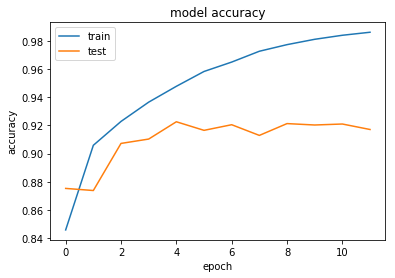

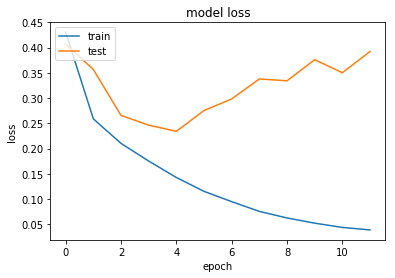

Training rotated model with rotated dataset...
Epoch 1/60
469/468 [==============================] - 18s 38ms/step - loss: 0.9912 - acc: 0.6449 - val_loss: 1.1356 - val_acc: 0.6399
Epoch 2/60
469/468 [==============================] - 17s 36ms/step - loss: 0.6283 - acc: 0.7709 - val_loss: 0.6824 - val_acc: 0.7654
Epoch 3/60
469/468 [==============================] - 17s 36ms/step - loss: 0.5218 - acc: 0.8114 - val_loss: 0.6123 - val_acc: 0.7804
Epoch 4/60
469/468 [==============================] - 17s 36ms/step - loss: 0.4626 - acc: 0.8321 - val_loss: 0.5397 - val_acc: 0.8095
Epoch 5/60
469/468 [==============================] - 17s 36ms/step - loss: 0.4292 - acc: 0.8468 - val_loss: 0.4948 - val_acc: 0.8265
Epoch 6/60
469/468 [==============================] - 17s 36ms/step - loss: 0.4020 - acc: 0.8549 - val_loss: 0.4683 - val_acc: 0.8404
Epoch 7/60
469/468 [==============================] - 17s 36ms/step - loss: 0.3788 - acc: 0.8634 - val_loss: 0.4120 - val_acc: 0.8559
Epoch 8/60
469/

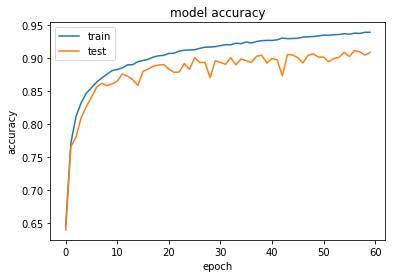

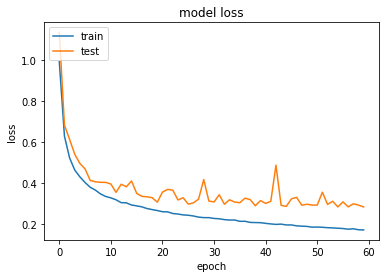

Testing both models on both datasets...
rotated_model_test_dataset score: loss=0.308095, accuracy=0.904500
model_test_dataset score: loss=0.392152, accuracy=0.917100
rotated_model_rotated_test_dataset score: loss=0.277445, accuracy=0.906800
model_rotated_test_dataset score: loss=7.194877, accuracy=0.203300


In [27]:
import experiment
batch_size = 128
# 10 for cifar10, 2 for mnist, 5 for fashion_mnist, 10 for cluttered_mnist
epochs={'cifar10':15,'mnist':10,'fashion_mnist':12,'cluttered_mnist':10}

rotated_epochs={'cifar10':120,'mnist':20,'fashion_mnist':60,'cluttered_mnist':30}

scores=experiment.train_rotated(model,rotated_model,x_train,y_train,x_test,
                          y_test,num_classes,input_shape,batch_size,epochs[dataset],rotated_epochs[dataset])


for k,v in scores.items():
    print('%s score: loss=%f, accuracy=%f' % (k,v[0],v[1]))


In [28]:
from datetime import datetime

output_file="results/lecun.txt"
f= open(output_file,"a+")
general_message="%s\nResults on dataset %s with model %s and rotated model %s\n" % (str(datetime.now()),dataset,model.name,rotated_model.name)
f.write(general_message)
print(general_message)
for k,v in scores.items():
    message='%s score: loss=%f, accuracy=%f\n' % (k,v[0],v[1])
    print(message)
    f.write(message)
f.write("\n\n")    
f.close()

2018-04-21 00:10:21.537895
Results on dataset fashion_mnist with model all_conv and rotated model all_conv

rotated_model_test_dataset score: loss=0.308095, accuracy=0.904500

model_test_dataset score: loss=0.392152, accuracy=0.917100

rotated_model_rotated_test_dataset score: loss=0.277445, accuracy=0.906800

model_rotated_test_dataset score: loss=7.194877, accuracy=0.203300

